In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 13441, done.
remote: Counting objects: 100% (243/243), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 13441 (delta 177), reused 228 (delta 167), pack-reused 13198
Receiving objects: 100% (13441/13441), 13.24 MiB | 25.06 MiB/s, done.
Resolving deltas: 100% (9236/9236), done.


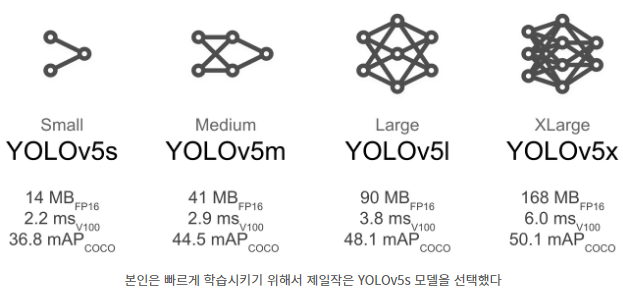

In [ ]:
!pip install -r /content/yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.4 MB/s 


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nJ2mdn26LwmCqrzUjHoy")
project = rf.workspace("brad-dwyer").project("pklot-1tros")
dataset = project.version(2).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 145 kB 5.1 MB/s 
     |████████████████████████████████| 178 kB 45.6 MB/s 
     |████████████████████████████████| 1.1 MB 42.3 MB/s 
     |████████████████████████████████| 67 kB 5.5 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 138 kB 56.9 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Created wheel for roboflow: filename=roboflow-0.2.15-py3-none-any.whl size=24936 sha256=35f4c29c7e6bc4075370909dc7aec97f4010847bece203e80e493d06267b6b27
  Stored in directory: /root/.cache/pip/wheels/13/e0/a3/fe183fffc3972cb9264e800763d4bbfff80d5309137c410217
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=3b280766e9363bdcd57a95a01c810bc51b5dbee3b066eb3099e94604de534f87
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to PKLot-2 in yolov5pytorch:: 100%|██████████| 24844/24844 [00:10<00:00, 2261.32it/s]


In [ ]:
``
!python /content/yolov5/export.py --weights /content/last.pt --include torchscript \
--data /content/PKLot-2/data.yaml

export: data=/content/PKLot-2/data.yaml, weights=['/content/last.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript']
YOLOv5 🚀 v6.2-186-g7f097dd Python-3.7.14 torch-1.12.1+cu113 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from /content/last.pt with output shape (1, 25200, 7) (13.8 MB)

TorchScript: starting export with torch 1.12.1+cu113...
TorchScript: export success ✅ 5.8s, saved as /content/last.torchscript.ptl (27.2 MB)

Export complete (9.6s)
Results saved to /content
Detect:          python detect.py --weights /content/last.torchscript.ptl 
Validate:        python val.py --weights /content/last.torchscript.ptl 
PyTorch Hub:     model = torch.hub.load('ultral

In [ ]:
import torch
from torch.utils.mobile_optimizer import optimize_for_mobile

torchscript_model = 'yolov5s_last.torchscript.pt'
export_model_name = 'yolov5s_last.torchscript.ptl'

model = torch.jit.load(torchscript_model)
optimized_model = optimize_for_mobile(model)
optimized_model._save_for_lite_interpreter(export_model_name)

print(f"mobile optimizerd model exported to {export_model_name}")

mobile optimizerd model exported to yolov5s_last.torchscript.ptl
